# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset

In [2]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [3]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [4]:
train['breed_category']=train['breed_category'].astype(int)

In [5]:
train.corr()['breed_category']

condition        -0.483503
length(m)         0.007229
height(cm)        0.011647
X1                0.240729
X2                0.052530
breed_category    1.000000
pet_category      0.209230
Name: breed_category, dtype: float64

In [6]:
train.isna().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
pet_id            18834 non-null object
issue_date        18834 non-null object
listing_date      18834 non-null object
condition         17357 non-null float64
color_type        18834 non-null object
length(m)         18834 non-null float64
height(cm)        18834 non-null float64
X1                18834 non-null int64
X2                18834 non-null int64
breed_category    18834 non-null int32
pet_category      18834 non-null int64
dtypes: float64(3), int32(1), int64(3), object(4)
memory usage: 1.5+ MB


In [8]:
data= pd.concat([train,test],sort=False)

In [9]:
data.tail()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
8067,ANSL_66809,2016-02-10 00:00:00,2017-03-10 14:56:00,2.0,Brown,0.82,36.08,13,9,NaN,NaN
8068,ANSL_59041,2015-12-07 00:00:00,2018-02-12 00:00:00,0.0,Tan,0.49,27.54,13,9,NaN,NaN
8069,ANSL_60034,2015-12-08 00:00:00,2017-01-04 17:19:00,0.0,Black,0.98,37.19,0,7,NaN,NaN
8070,ANSL_58066,2016-06-28 00:00:00,2017-07-20 18:19:00,NaN,Black,0.79,23.83,0,2,NaN,NaN
8071,ANSL_69436,2016-02-02 00:00:00,2017-02-28 16:47:00,0.0,Black,0.64,24.51,0,1,NaN,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26906 entries, 0 to 8071
Data columns (total 11 columns):
pet_id            26906 non-null object
issue_date        26906 non-null object
listing_date      26906 non-null object
condition         24810 non-null float64
color_type        26906 non-null object
length(m)         26906 non-null float64
height(cm)        26906 non-null float64
X1                26906 non-null int64
X2                26906 non-null int64
breed_category    18834 non-null float64
pet_category      18834 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


# Value counts for the different variables

In [11]:
data['color_type'].value_counts()

Black                6575
White                3486
Brown                2592
Brown Tabby          2399
Tan                  1934
Blue                 1235
Orange Tabby         1123
Red                   742
Brown Brindle         718
Tricolor              664
Blue Tabby            557
Tortie                512
Calico                495
Gray                  436
Chocolate             392
Torbie                341
Cream Tabby           260
Cream                 240
Sable                 232
Fawn                  215
Yellow                208
Buff                  183
Lynx Point            173
Blue Merle            134
Seal Point            115
Gray Tabby             96
Black Brindle          92
Black Tabby            86
Flame Point            74
Brown Merle            61
Orange                 56
Black Smoke            42
Blue Tick              41
Gold                   40
Tortie Point           34
Red Tick               34
Silver                 34
Silver Tabby           26
Red Merle   

In [12]:
data['breed_category'].value_counts()

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64

In [13]:
data['pet_category'].value_counts()

2.0    10621
1.0     7184
4.0      941
0.0       88
Name: pet_category, dtype: int64

In [14]:
data['condition'].value_counts()

1.0    9747
0.0    8966
2.0    6097
Name: condition, dtype: int64

In [15]:
data['X1'].value_counts()

0     15397
13     6088
7      2111
16      858
15      775
18      754
17      367
9       144
12      103
11       83
1        83
8        65
2        32
6        15
4        10
10        9
5         5
14        3
19        3
3         1
Name: X1, dtype: int64

In [16]:
data['X2'].value_counts()

1    12232
9     7314
7     5120
4     1771
2      257
3      101
8       82
5       17
6        6
0        6
Name: X2, dtype: int64

#### Converting height(cm) into height(m)

In [17]:
data['height(m)']=data['height(cm)'].apply(lambda x: x/100)
data.drop(columns=['height(cm)'],inplace=True)

In [18]:
data.corr()['condition']

condition         1.000000
length(m)        -0.006294
X1                0.338600
X2                0.383901
breed_category   -0.483503
pet_category     -0.041660
height(m)        -0.008879
Name: condition, dtype: float64

## Feature Engineering

In [19]:
data['1stnum'] = data['pet_id'].str[:6]
data['1st2num'] = data['pet_id'].str[:7]

In [20]:
import datetime as dt

In [21]:
data['ISSUE_DATE']= data['issue_date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
data['LISTING_DATE']= data['listing_date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [22]:
def fxy(x,y):
    return ((y-x).days)
data['duration']= data.apply(lambda x: fxy(x['ISSUE_DATE'],x['LISTING_DATE']), axis=1)
data['listing_month']=data['LISTING_DATE'].apply(lambda x: x.month)
data['issue_month']=data['LISTING_DATE'].apply(lambda x: x.month)

In [23]:
def len_by_height(x,y):
    return (x/y)
data['ratio']=data.apply(lambda x: len_by_height(x['length(m)'],x['height(m)']),axis=1)

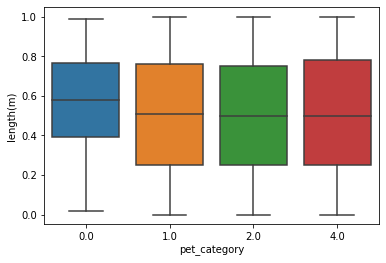

In [24]:
sns.boxplot(x='pet_category',y='length(m)',data=data)

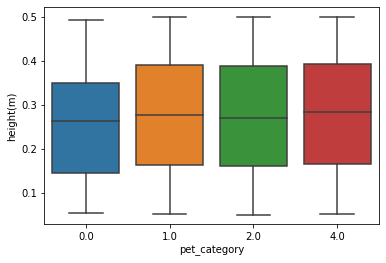

In [25]:
sns.boxplot(x='pet_category',y='height(m)',data=data)

In [26]:
data[data['length(m)']==0]

,pet_id,issue_date,listing_date,condition,color_type,length(m),X1,X2,breed_category,pet_category,height(m),1stnum,1st2num,ISSUE_DATE,LISTING_DATE,duration,listing_month,issue_month,ratio
83,ANSL_73664,2017-10-04 00:00:00,2018-12-02 08:09:00,1.0,Black,0.0,7,1,0.0,2.0,0.3298,ANSL_7,ANSL_73,2017-10-04,2018-12-02 08:09:00,424,12,12,0.0
91,ANSL_72100,2017-06-09 00:00:00,2018-07-03 14:53:00,0.0,Tan,0.0,0,7,1.0,2.0,0.2220,ANSL_7,ANSL_72,2017-06-09,2018-07-03 14:53:00,389,7,7,0.0
174,ANSL_55528,2016-07-07 00:00:00,2017-09-28 14:19:00,0.0,Black,0.0,0,1,1.0,2.0,0.1710,ANSL_5,ANSL_55,2016-07-07,2017-09-28 14:19:00,448,9,9,0.0
220,ANSL_59822,2018-05-11 00:00:00,2018-09-22 17:22:00,0.0,Brown,0.0,0,1,1.0,2.0,0.2055,ANSL_5,ANSL_59,2018-05-11,2018-09-22 17:22:00,134,9,9,0.0
404,ANSL_58956,2018-07-14 00:00:00,2018-10-11 17:12:00,1.0,Lynx Point,0.0,7,1,0.0,1.0,0.3949,ANSL_5,ANSL_58,2018-07-14,2018-10-11 17:12:00,89,10,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,ANSL_74552,2013-09-26 00:00:00,2018-10-16 15:08:00,NaN,Gray,0.0,11,4,NaN,NaN,0.1481,ANSL_7,ANSL_74,2013-09-26,2018-10-16 15:08:00,1846,10,10,0.0
7102,ANSL_76094,2018-01-25 00:00:00,2019-04-24 19:13:00,0.0,White,0.0,0,1,NaN,NaN,0.0649,ANSL_7,ANSL_76,2018-01-25,2019-04-24 19:13:00,454,4,4,0.0
7153,ANSL_67961,2017-01-03 00:00:00,2017-10-07 16:07:00,2.0,Black,0.0,0,7,NaN,NaN,0.1673,ANSL_6,ANSL_67,2017-01-03,2017-10-07 16:07:00,277,10,10,0.0
7342,ANSL_72540,2005-12-29 00:00:00,2019-02-23 12:18:00,0.0,White,0.0,0,7,NaN,NaN,0.4006,ANSL_7,ANSL_72,2005-12-29,2019-02-23 12:18:00,4804,2,2,0.0


In [27]:
data['length(m)'].replace(0,data['length(m)'].mean(),inplace=True)

In [28]:
def X1mulX2(x,y):
    return x*(y)
data['X1mulX2']=data.apply(lambda x: X1mulX2(x['X1'],x['X2']),axis=1)

In [29]:
data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),X1,X2,breed_category,pet_category,height(m),1stnum,1st2num,ISSUE_DATE,LISTING_DATE,duration,listing_month,issue_month,ratio,X1mulX2
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,13,9,0.0,1.0,0.0778,ANSL_6,ANSL_69,2016-07-10,2016-09-21 16:25:00,73,9,9,10.282776,117
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,13,9,0.0,2.0,0.1419,ANSL_6,ANSL_66,2013-11-21,2018-12-27 17:47:00,1862,12,12,5.073996,117
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,15,4,2.0,4.0,0.4090,ANSL_6,ANSL_69,2014-09-28,2016-10-19 08:24:00,752,10,10,0.366748,60
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,0,1,0.0,2.0,0.1782,ANSL_7,ANSL_71,2016-12-31,2019-01-25 18:30:00,755,1,1,3.479237,0
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,18,4,0.0,1.0,0.1106,ANSL_5,ANSL_57,2017-09-28,2017-11-19 09:38:00,52,11,11,4.520796,72


In [30]:
data.corr()['pet_category'].sort_values()

X1mulX2          -0.125650
condition        -0.041660
listing_month    -0.041149
issue_month      -0.041149
X1               -0.032594
X2               -0.032116
length(m)        -0.004544
height(m)         0.001976
ratio             0.003662
duration          0.093331
breed_category    0.209230
pet_category      1.000000
Name: pet_category, dtype: float64

In [31]:
data.corr()['breed_category'].sort_values()

condition        -0.483503
duration         -0.102774
ratio            -0.001143
length(m)         0.006565
height(m)         0.011647
listing_month     0.021798
issue_month       0.021798
X2                0.052530
X1mulX2           0.155233
pet_category      0.209230
X1                0.240729
breed_category    1.000000
Name: breed_category, dtype: float64

### Filling null values in condition column with value -1

In [32]:
data['condition'].fillna(value=-1,inplace= True)
data['condition']= data['condition'].astype(int)

In [33]:
data.groupby(['condition','breed_category']).size()

condition  breed_category
-1         2.0               1477
 0         1.0               6281
 1         0.0               6819
 2         0.0               2181
           1.0               2076
dtype: int64

In [34]:
data.drop(columns=['pet_id','issue_date','listing_date','ISSUE_DATE','LISTING_DATE',
                   'breed_category','pet_category'],inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26906 entries, 0 to 8071
Data columns (total 13 columns):
condition        26906 non-null int32
color_type       26906 non-null object
length(m)        26906 non-null float64
X1               26906 non-null int64
X2               26906 non-null int64
height(m)        26906 non-null float64
1stnum           26906 non-null object
1st2num          26906 non-null object
duration         26906 non-null int64
listing_month    26906 non-null int64
issue_month      26906 non-null int64
ratio            26906 non-null float64
X1mulX2          26906 non-null int64
dtypes: float64(3), int32(1), int64(6), object(3)
memory usage: 3.4+ MB


### Converting categorical columns into One Hot Encoding

In [36]:
train_ohe = data[:18834]
test_ohe = data[18834:]

In [37]:
train_ohe.select_dtypes(exclude='number').columns.to_list()

['color_type', '1stnum', '1st2num']

In [38]:
train_ohe.shape

(18834, 13)

In [39]:
train_ohe=pd.get_dummies(train_ohe)
test_ohe=pd.get_dummies(test_ohe)

In [40]:
train_ohe.shape, test_ohe.shape

((18834, 98), (8072, 96))

In [41]:
a=list(set(train_ohe.columns)-set(test_ohe.columns))
a

['color_type_Black Tiger', 'color_type_Brown Tiger']

In [42]:
train_ohe=train_ohe.drop(a,axis=1)

In [43]:
train_ohe.shape, test_ohe.shape

((18834, 96), (8072, 96))

In [44]:
#again combining
data = pd.concat((train_ohe, test_ohe)).reset_index(drop=True)

## Standard Scaling

In [45]:
names = data.columns

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(data)
data = pd.DataFrame(scaled_df, columns=names)

In [46]:
data.head()

,condition,length(m),X1,X2,height(m),duration,listing_month,issue_month,ratio,X1mulX2,...,1st2num_ANSL_67,1st2num_ANSL_68,1st2num_ANSL_69,1st2num_ANSL_70,1st2num_ANSL_71,1st2num_ANSL_72,1st2num_ANSL_73,1st2num_ANSL_74,1st2num_ANSL_75,1st2num_ANSL_76
0,1.409180,1.023341,1.169789,1.262750,-1.514343,-0.712206,0.622139,0.622139,2.916819,1.467414,...,-0.196472,-0.196472,5.089794,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.183557
1,0.292938,0.744320,1.169789,1.262750,-1.020842,0.916017,1.457140,1.457140,0.942882,1.467414,...,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.183557
2,-1.939546,-1.243703,1.475018,-0.157894,1.035542,-0.094228,0.900472,0.900472,-0.840993,0.410870,...,-0.196472,-0.196472,5.089794,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.183557
3,0.292938,0.395544,-0.814202,-1.010281,-0.741371,-0.091497,-1.604531,-1.604531,0.338527,-0.701282,...,-0.196472,-0.196472,-0.196472,-0.196472,5.089794,-0.196472,-0.196472,-0.196472,-0.196472,-0.183557
4,1.409180,-0.022987,1.932862,-0.157894,-1.261818,-0.731319,1.178806,1.178806,0.733239,0.633300,...,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.183557


In [47]:
train_new= data[:18834].copy()
test_new= data[18834:].copy()

In [48]:
test_new.head()

,condition,length(m),X1,X2,height(m),duration,listing_month,issue_month,ratio,X1mulX2,...,1st2num_ANSL_67,1st2num_ANSL_68,1st2num_ANSL_69,1st2num_ANSL_70,1st2num_ANSL_71,1st2num_ANSL_72,1st2num_ANSL_73,1st2num_ANSL_74,1st2num_ANSL_75,1st2num_ANSL_76
18834,-0.823304,1.267484,-0.814202,0.694493,1.176432,3.229570,0.622139,0.622139,-0.208392,-0.701282,...,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,5.089794,-0.183557
18835,0.292938,-1.557601,-0.814202,-1.010281,-1.596722,-0.620283,-0.491196,-0.491196,-0.641112,-0.701282,...,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,5.447898
18836,0.292938,-0.929805,-0.814202,0.694493,1.059409,1.040705,-0.769530,-0.769530,-0.759275,-0.701282,...,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.183557
18837,0.292938,-0.755417,0.254101,-1.010281,-1.461991,0.266184,-0.769530,-0.769530,0.319070,-0.571531,...,5.089794,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.183557
18838,0.292938,0.709443,-0.814202,0.694493,0.267189,-0.357255,-0.769530,-0.769530,-0.109783,-0.701282,...,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,5.089794,-0.196472,-0.196472,-0.196472,-0.183557


# Model 1 for predicting 'pet_category'

In [49]:
from sklearn.model_selection import train_test_split

y=train['pet_category']
X_train, X_val, y_train, y_val = train_test_split(train_new, y, test_size=0.2,random_state=101)

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [51]:
clf_xgb = XGBClassifier(objective = 'multi:softmax', num_class=4)

## Hyperparameter Tuning

In [52]:
#clf.fit(X_train,y_train)

In [53]:
#clf.best_estimator_

In [54]:
#got 90.84950 score
best_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=6, monotone_constraints=None,
              n_estimators=200, n_jobs=0, num_class=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.4,
              reg_lambda=1, scale_pos_weight=None, subsample=0.6,
              tree_method='exact', validate_parameters=False, verbosity=None)


best_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=0, num_class=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.4,
              reg_lambda=1, scale_pos_weight=None, subsample=0.6,
              tree_method='exact', validate_parameters=False, verbosity=None)

In [55]:
val_pred=best_model.predict(X_val)

In [56]:
val_pred

array([1, 2, 2, ..., 1, 2, 2], dtype=int64)

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(val_pred,y_val))

              precision    recall  f1-score   support

           0       0.14      1.00      0.25         2
           1       0.84      0.91      0.88      1319
           2       0.95      0.89      0.92      2264
           4       0.82      0.92      0.87       182

    accuracy                           0.90      3767
   macro avg       0.69      0.93      0.73      3767
weighted avg       0.90      0.90      0.90      3767



In [59]:
pet_pred= best_model.predict(test_new)

In [60]:
pet_pred

array([2, 1, 2, ..., 2, 4, 2], dtype=int64)

In [61]:
pet_category=pd.DataFrame(data= pet_pred,columns=['pet_category'])

In [62]:
pet_category.reset_index(drop=True,inplace=True)
test_new.reset_index(drop=True,inplace=True)

In [63]:
test_final=pd.concat([test_new,pet_category],sort=False,axis=1)

In [64]:
test_final.head()

,condition,length(m),X1,X2,height(m),duration,listing_month,issue_month,ratio,X1mulX2,...,1st2num_ANSL_68,1st2num_ANSL_69,1st2num_ANSL_70,1st2num_ANSL_71,1st2num_ANSL_72,1st2num_ANSL_73,1st2num_ANSL_74,1st2num_ANSL_75,1st2num_ANSL_76,pet_category
0,-0.823304,1.267484,-0.814202,0.694493,1.176432,3.229570,0.622139,0.622139,-0.208392,-0.701282,...,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,5.089794,-0.183557,2
1,0.292938,-1.557601,-0.814202,-1.010281,-1.596722,-0.620283,-0.491196,-0.491196,-0.641112,-0.701282,...,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,5.447898,1
2,0.292938,-0.929805,-0.814202,0.694493,1.059409,1.040705,-0.769530,-0.769530,-0.759275,-0.701282,...,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.183557,2
3,0.292938,-0.755417,0.254101,-1.010281,-1.461991,0.266184,-0.769530,-0.769530,0.319070,-0.571531,...,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.183557,2
4,0.292938,0.709443,-0.814202,0.694493,0.267189,-0.357255,-0.769530,-0.769530,-0.109783,-0.701282,...,-0.196472,-0.196472,-0.196472,-0.196472,5.089794,-0.196472,-0.196472,-0.196472,-0.183557,2


In [65]:
test_final['pet_category'].value_counts()

2    4912
1    2798
4     351
0      11
Name: pet_category, dtype: int64

In [66]:
train_final= pd.concat([train_new,train['pet_category']],sort=False,axis=1)

In [67]:
train_final.head()

,condition,length(m),X1,X2,height(m),duration,listing_month,issue_month,ratio,X1mulX2,...,1st2num_ANSL_68,1st2num_ANSL_69,1st2num_ANSL_70,1st2num_ANSL_71,1st2num_ANSL_72,1st2num_ANSL_73,1st2num_ANSL_74,1st2num_ANSL_75,1st2num_ANSL_76,pet_category
0,1.409180,1.023341,1.169789,1.262750,-1.514343,-0.712206,0.622139,0.622139,2.916819,1.467414,...,-0.196472,5.089794,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.183557,1
1,0.292938,0.744320,1.169789,1.262750,-1.020842,0.916017,1.457140,1.457140,0.942882,1.467414,...,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.183557,2
2,-1.939546,-1.243703,1.475018,-0.157894,1.035542,-0.094228,0.900472,0.900472,-0.840993,0.410870,...,-0.196472,5.089794,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.183557,4
3,0.292938,0.395544,-0.814202,-1.010281,-0.741371,-0.091497,-1.604531,-1.604531,0.338527,-0.701282,...,-0.196472,-0.196472,-0.196472,5.089794,-0.196472,-0.196472,-0.196472,-0.196472,-0.183557,2
4,1.409180,-0.022987,1.932862,-0.157894,-1.261818,-0.731319,1.178806,1.178806,0.733239,0.633300,...,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.196472,-0.183557,1


# Model 2 for predicting 'breed_category'

In [68]:
y_breed=train['breed_category']
X_train_breed, X_val_breed, y_train_breed, y_val_breed = train_test_split(train_final, y_breed, test_size=0.2,random_state=101)

## Hyperparameter Tuning for Model 2

In [69]:
#clf_breed.fit(X_train_breed,y_train_breed)

In [70]:
#clf_breed.best_estimator_

In [71]:
#got 90.84950 score
model_breed=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=400, n_jobs=0, num_class=3, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.2,
              reg_lambda=0.2, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=False, verbosity=None)

In [72]:
model_breed.fit(X_train_breed,y_train_breed)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=0, num_class=3, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.2,
              reg_lambda=0.2, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=False, verbosity=None)

In [73]:
val_pred_breed=model_breed.predict(X_val_breed)

In [74]:
print(classification_report(y_val_breed,val_pred_breed))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1787
           1       0.93      0.87      0.90      1673
           2       1.00      1.00      1.00       307

    accuracy                           0.91      3767
   macro avg       0.94      0.94      0.94      3767
weighted avg       0.91      0.91      0.91      3767



In [75]:
test_breed_pred= model_breed.predict(test_final)

In [76]:
test_breed_pred

array([1, 0, 0, ..., 1, 2, 1])

In [77]:
breed_category= pd.DataFrame(data= test_breed_pred,columns=['breed_category'])

## Combining predicted categories of test set

In [78]:
submission=pd.concat([test['pet_id'],breed_category,pet_category],sort=False,axis=1)

In [79]:
submission.to_csv('final_output.csv',index=False)

In [80]:
pd.read_csv('final_output.csv')

,pet_id,breed_category,pet_category
0,ANSL_75005,1,2
1,ANSL_76663,0,1
2,ANSL_58259,0,2
3,ANSL_67171,0,2
4,ANSL_72871,0,2
...,...,...,...
8067,ANSL_66809,0,2
8068,ANSL_59041,1,2
8069,ANSL_60034,1,2
8070,ANSL_58066,2,4
